In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from yellowbrick.target import class_balance
from yellowbrick.features import *

In [57]:
data = pd.read_csv('../10-Data/credit-card-fraud-data.zip')

In [58]:
data = data.set_index('Time')

In [59]:
data.shape

(284807, 30)

In [60]:
data.dtypes

V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [61]:
data.sample(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,,,,,,,,,,,,,,,,,,,,,
128663.0,1.851039,-0.995222,-1.804547,-0.845797,1.590379,3.873163,-1.197684,1.026194,1.354591,-0.224793,...,0.217816,0.615750,0.116846,0.748963,-0.157073,0.138871,0.022868,-0.036785,74.95,0
67630.0,-0.644624,-0.731625,2.422640,-0.573943,-0.156335,1.410603,-1.297648,0.323475,0.353645,0.559725,...,0.011187,0.744845,-0.593306,-1.211418,0.481072,0.234337,0.122648,-0.212248,2.00,0
157359.0,1.899137,0.480759,-0.722633,3.652916,0.516483,0.221548,0.093376,-0.016256,-1.127475,1.633932,...,0.323715,1.020986,-0.064554,-0.313500,0.238293,0.242789,-0.036522,-0.064198,10.62,0
88071.0,-1.872156,1.450177,-1.933101,-2.653269,0.536227,-1.378702,1.392784,-0.827886,0.848945,-0.139765,...,0.711686,0.497936,0.215426,0.802301,-0.050182,0.494234,0.297260,-0.230735,80.00,0
107448.0,0.541906,-2.031703,-3.030169,2.158803,0.131931,-1.249997,2.061574,-0.901588,0.946445,-0.347576,...,0.642446,0.472399,-0.910869,0.010204,0.537642,-0.315543,-0.231072,0.053692,807.08,0


In [62]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

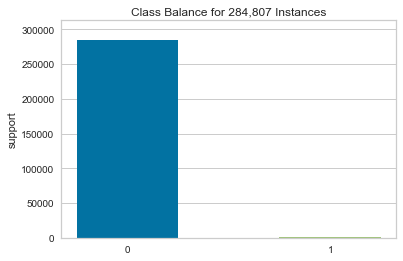

In [63]:
class_balance(data.Class);

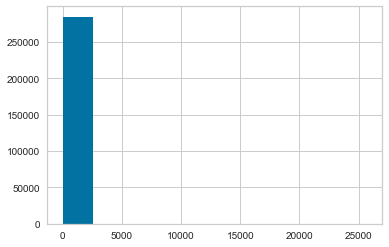

In [64]:
plt.hist(data.Amount);

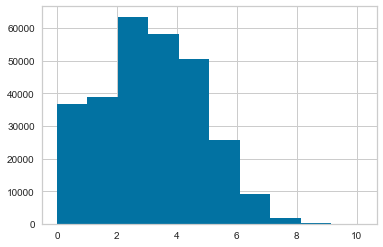

In [65]:
plt.hist(np.log1p(data.Amount));

In [66]:
data.Amount.describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [67]:
data['logAmount'] = np.log1p(data.Amount)
data = data.drop(columns={'Amount'})

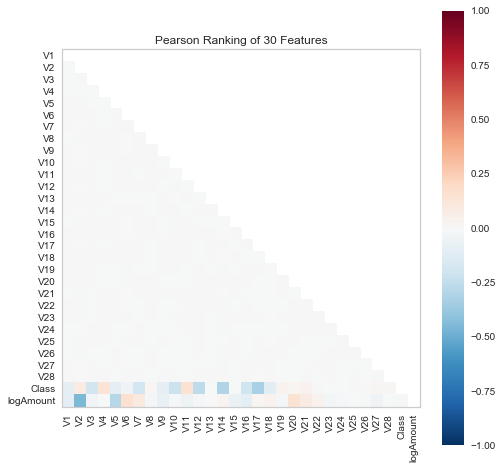

In [68]:
plt.figure(figsize=(8,8))
rank2d(data);

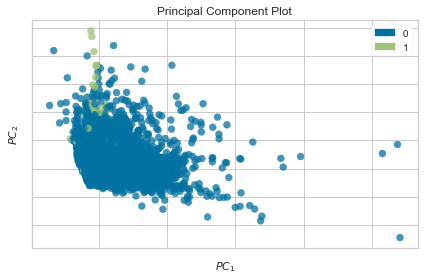

In [69]:
pca_decomposition(data.loc[:, data.columns != 'Class'], data.Class);

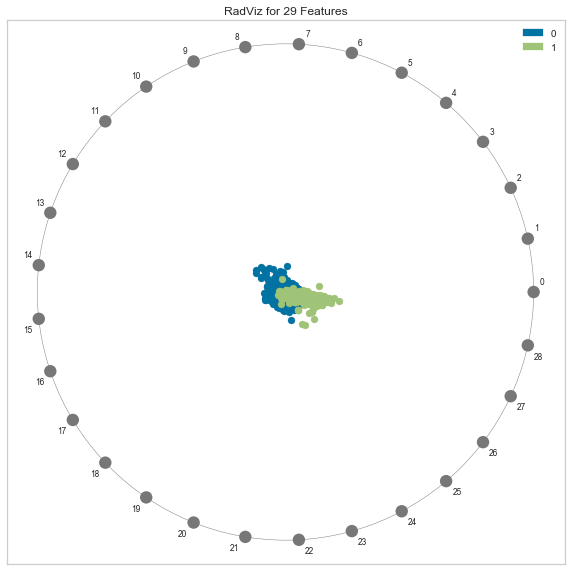

In [70]:
plt.figure(figsize=(10,10))
radviz(data.loc[:, data.columns != 'Class'].to_numpy(), data.Class.to_numpy());